In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Assingment_Dataset.xlsx")

### Movement Analysis

In [3]:
# Load geospatial data
df = df

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Movement counts by type
movement_counts = df.groupby(['Location', 'Movement Type']).size().unstack(fill_value=0)
print("Movement Counts by Location and Type:")
print(movement_counts)

# Movement counts over time
time_series = df.set_index('Timestamp').resample('D').size()  # Daily counts
print("Movement Counts Over Time:")
print(time_series)


Movement Counts by Location and Type:
Movement Type        Entry  Exit
Location                        
Border Post Alpha        3     2
Border Post Bravo        3     3
Border Post Charlie      3     3
Border Post Delta        3     3
Border Post Echo         4     3
Movement Counts Over Time:
Timestamp
2024-03-01    1
2024-03-02    1
2024-03-03    0
2024-03-04    0
2024-03-05    1
             ..
2024-05-05    0
2024-05-06    0
2024-05-07    1
2024-05-08    0
2024-05-09    1
Freq: D, Length: 70, dtype: int64


### Geospatial Visualization  

In [4]:
# Load geospatial data
df = df

# Initialize map centered around the average latitude and longitude
avg_lat = df['Latitude'].mean()
avg_lon = df['Longitude'].mean()
m = folium.Map(location=[avg_lat, avg_lon], zoom_start=12)

# Add entries and exits to the map
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Location: {row['Location']}<br>Type: {row['Movement Type']}",
        icon=folium.Icon(color='blue' if row['Movement Type'] == 'Entry' else 'red')
    ).add_to(m)

# Save the map as an HTML file
m.save('movement_map.html')
m

### Temporal Analysis

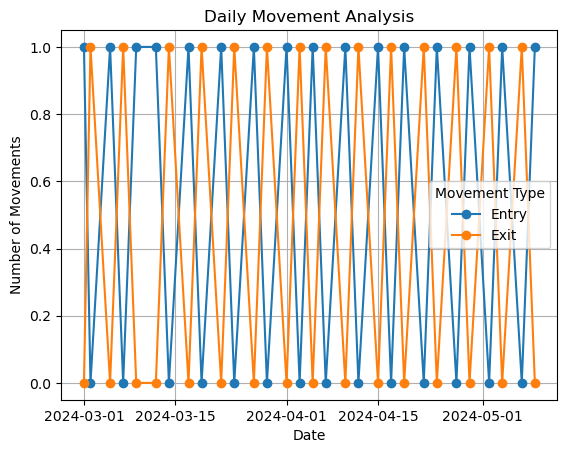

In [5]:
# Load geospatial data
df = df

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot entries and exits over time
df['Date'] = df['Timestamp'].dt.date
daily_movement = df.groupby(['Date', 'Movement Type']).size().unstack().fillna(0)

# Plot
daily_movement.plot(kind='line', marker='o')
plt.title('Daily Movement Analysis')
plt.xlabel('Date')
plt.ylabel('Number of Movements')
plt.savefig("Daily Movement Analysis.png")
plt.grid(True)
plt.show()